## Import Packages

In [1]:
# pip install moviepy
# conda install -c conda-forge ffmpeg

In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


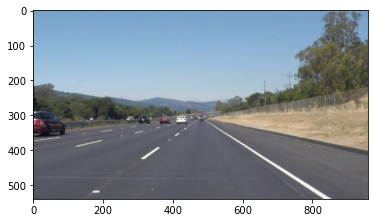

In [3]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Build a Lane Finding Pipeline



In [15]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.

def lane_finding(image): 
    imshape = image.shape
    result_image = np.copy(image)
    # Grayscale the image
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

    # Canny transform
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    # Select ROI
    mask = np.zeros(edges.shape, dtype=edges.dtype)
    
    vertices = np.array([[(0, imshape[0]), (imshape[1]//2-5, imshape[0]//2+45), (imshape[1]//2+5, imshape[0]//2+45), (imshape[1], imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, 255)
    masked_edges = cv2.bitwise_and(edges, mask)
    
    # Hough Transform
    rho = 1
    theta = np.pi/180
    threshold = 30 
    min_line_length = 10
    max_line_gap = 50
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)
    edge_3d = np.dstack((edges, edges, edges))
    
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(result_image, (x1, y1), (x2, y2), (255, 0, 0), 3)
        
    return result_image

## Test Images

In [16]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

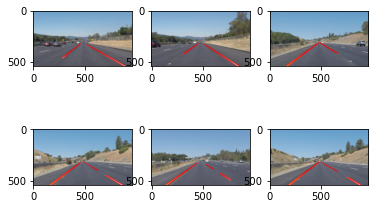

In [17]:
import glob
dir_testimg = glob.glob('test_images/*.jpg')

for i,test in enumerate(dir_testimg):
    image = mpimg.imread(test)
    result = lane_finding(image)
    plt.subplot(2,3,i+1)
    plt.imshow(result)
#     print(test[12:-4])
#     mpimg.imsave('test_images/'+'result_'+test[12:-4]+'.jpg', result)

## Test on Videos

In [18]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [19]:
def process_image(image):
    result = lane_finding(image)
    return result

In [20]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!

%time white_clip.write_videofile(white_output, audio=False)

t:   0%|                                                                             | 0/221 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/solidWhiteRight.mp4.
Moviepy - Writing video test_videos_output/solidWhiteRight.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/solidWhiteRight.mp4
Wall time: 12.1 s


In [21]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [22]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

t:   0%|                                                                             | 0/681 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/solidYellowLeft.mp4.
Moviepy - Writing video test_videos_output/solidYellowLeft.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/solidYellowLeft.mp4
Wall time: 33.7 s


In [23]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Challenge

In [24]:
challenge_output = 'test_videos_output/challenge.mp4'

clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

t:   0%|                                                                             | 0/251 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/challenge.mp4.
Moviepy - Writing video test_videos_output/challenge.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/challenge.mp4
Wall time: 27.6 s


In [25]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))